# Graphical exploratory analysis

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines

In [56]:
df_swing = pd.read_csv("datasets/st1/2008_swing_states.csv")
df_swing.head()

state           county  total_votes  dem_votes  rep_votes  dem_share
0    PA      Erie County       127691      75775      50351      60.08
1    PA  Bradford County        25787      10306      15057      40.64
2    PA     Tioga County        17984       6390      11326      36.07
3    PA    McKean County        15947       6465       9224      41.21
4    PA    Potter County         7507       2300       5109      31.04

In [57]:
interested = df_swing[["state", "county", "dem_share"]]
interested.head()

state           county  dem_share
0    PA      Erie County      60.08
1    PA  Bradford County      40.64
2    PA     Tioga County      36.07
3    PA    McKean County      41.21
4    PA    Potter County      31.04

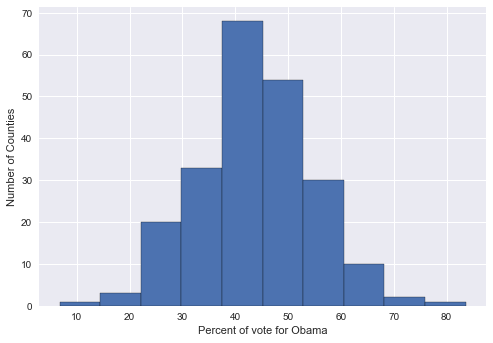

In [58]:
_ = plt.hist(df_swing["dem_share"])
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

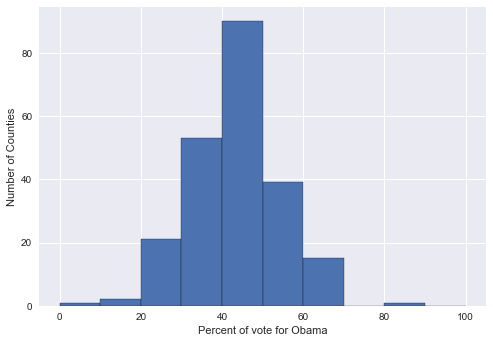

In [59]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70 , 80, 90, 100]

_ = plt.hist(df_swing["dem_share"], bins = bin_edges)
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

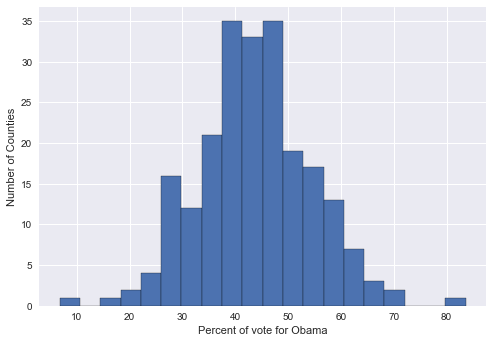

In [60]:
_ = plt.hist(df_swing["dem_share"], bins = 20)
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

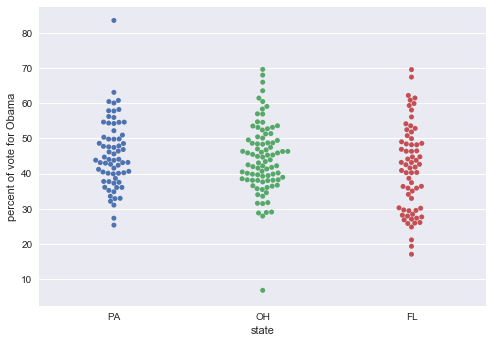

In [61]:
_ = sns.swarmplot(x = "state", y = "dem_share", data = df_swing)
_ = plt.xlabel("state")
_ = plt.ylabel("percent of vote for Obama")
plt.show()

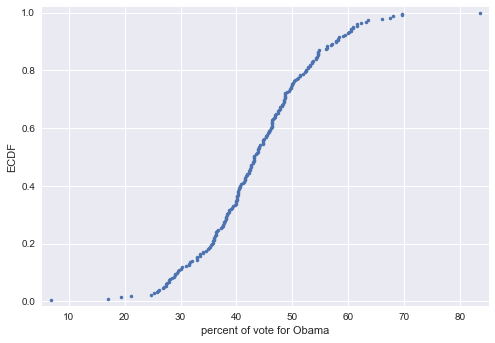

In [62]:
# Empirical cumulative distribution function (ECDF)
# 20% of counties had 36% or less vote for Obama
# 75% of counties had less than half vote for Obama

x = np.sort(df_swing["dem_share"])
y = np.arange(1, len(x) + 1) / len(x)

_ = plt.plot(x, y, marker = ".", linestyle = "none")
_ = plt.xlabel("percent of vote for Obama")
_ = plt.ylabel("ECDF")
plt.margins(0.02) # keeps the data off plot edges
plt.show()

In [63]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

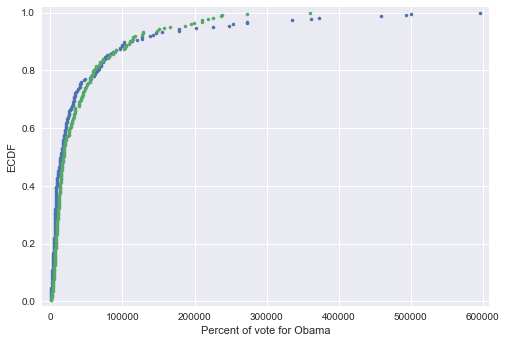

In [64]:
# dem_votes
# rep_votes

x1, y1 = ecdf(df_swing["dem_votes"])
x2, y2 = ecdf(df_swing["rep_votes"])

_ = plt.plot(x1, y1, marker = ".", linestyle = "none")
_ = plt.plot(x2, y2, marker = ".", linestyle = "none")

_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("ECDF")

plt.margins(0.02)
plt.show()

# Quantitative exploratory analysis

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

In [66]:
df_swing.head()

state           county  total_votes  dem_votes  rep_votes  dem_share
0    PA      Erie County       127691      75775      50351      60.08
1    PA  Bradford County        25787      10306      15057      40.64
2    PA     Tioga County        17984       6390      11326      36.07
3    PA    McKean County        15947       6465       9224      41.21
4    PA    Potter County         7507       2300       5109      31.04

In [67]:
dem_share_PA = df_swing[df_swing["state"] == "PA"]["dem_share"]

In [68]:
np.mean(dem_share_PA)

45.476417910447765

In [69]:
np.median(dem_share_PA)

44.030000000000001

The median is the 50th percentile in the ECDF. The 50th percentile is greater than 50% of the datapoints. 

In [70]:
np.percentile(df_swing["dem_share"], [25, 50, 75])

array([ 37.3025,  43.185 ,  49.925 ])

## Boxplots

IQR = Interquartile range (middle 50% of the data). Whisker extends 1.5 IQR. While there is no single definition for an outlier, being more than 2 IQR is a common criteria.

In [71]:
df_all_states = pd.read_csv("datasets/st1/2008_all_states.csv")
df_all_states.head()

state                                       county  total_votes  dem_votes  \
0    AK    State House District 8, Denali-University        10320       4995   
1    AK  State House District 37, Bristol Bay-Aleuti         4665       1868   
2    AK  State House District 12, Richardson-Glenn H         7589       1914   
3    AK      State House District 13, Greater Palmer        11526       2800   
4    AK     State House District 14, Greater Wasilla        10456       2132   

   rep_votes  other_votes  dem_share east_west  
0       4983          342      50.06      west  
1       2661          136      41.24      west  
2       5467          208      25.93      west  
3       8432          294      24.93      west  
4       8108          216      20.82      west

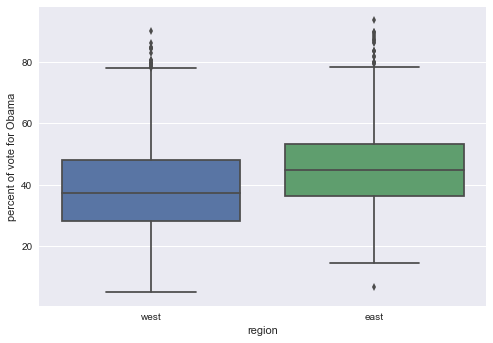

In [72]:
_ = sns.boxplot(x = "east_west", y = "dem_share", data = df_all_states)
_ = plt.xlabel("region")
_ = plt.ylabel("percent of vote for Obama")

plt.show()

In [73]:
np.var(dem_share_PA)

94.66503492982848

In [74]:
np.std(dem_share_PA)

9.729595825615187

In [75]:
difference = dem_share_PA - np.mean(dem_share_PA)
diff_sq = difference ** 2
variance_explicit = np.mean(diff_sq)

variance_np = np.var(dem_share_PA)

print(variance_explicit)
print(variance_np)

94.66503492982848
94.66503492982848


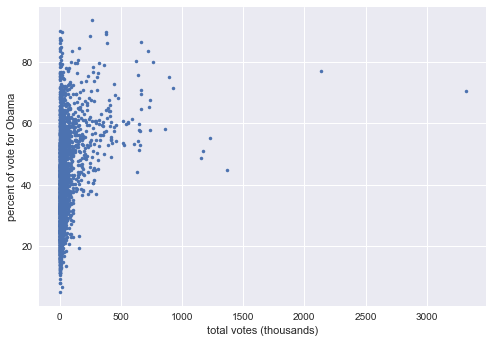

In [76]:
total_votes = df_all_states["total_votes"]
dem_share = df_all_states["dem_share"]

_ = plt.plot(total_votes / 1000, dem_share, marker = ".", linestyle = "none")
_ = plt.xlabel("total votes (thousands)")
_ = plt.ylabel("percent of vote for Obama")

plt.show()

In [77]:
df_all_states.head()

state                                       county  total_votes  dem_votes  \
0    AK    State House District 8, Denali-University        10320       4995   
1    AK  State House District 37, Bristol Bay-Aleuti         4665       1868   
2    AK  State House District 12, Richardson-Glenn H         7589       1914   
3    AK      State House District 13, Greater Palmer        11526       2800   
4    AK     State House District 14, Greater Wasilla        10456       2132   

   rep_votes  other_votes  dem_share east_west  
0       4983          342      50.06      west  
1       2661          136      41.24      west  
2       5467          208      25.93      west  
3       8432          294      24.93      west  
4       8108          216      20.82      west

In [78]:
demVotes = df_all_states["dem_votes"]
repVotes = df_all_states["rep_votes"]

In [79]:
covariance_matrix = np.cov(demVotes, repVotes)
covariance_matrix

array([[  5.88028888e+09,   2.97471185e+09],
       [  2.97471185e+09,   1.98956688e+09]])

In [80]:
covariance_matrix[0, 1]

2974711848.0903335

In [81]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

In [82]:
r = pearson_r(demVotes, repVotes)
print(r)

0.869693654405


## Random number generators

In [83]:
np.random.seed(88)

In [84]:
random_numbers = np.random.random(size = 4)
random_numbers

array([ 0.64755105,  0.50714969,  0.52834138,  0.8962852 ])

In [85]:
heads = random_numbers < 0.5
heads

array([False, False, False, False], dtype=bool)

In [86]:
np.sum(heads)

0

In [87]:
n_all_heads = 0

In [88]:
for _ in range(10000):
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

In [89]:
n_all_heads / 10000

0.064

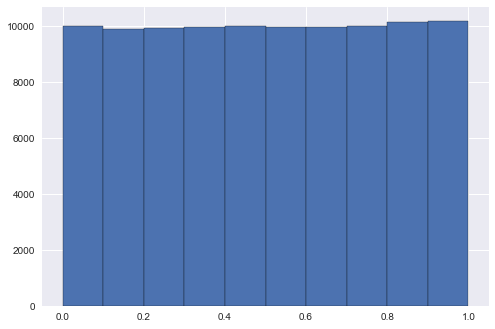

In [90]:
random_numbers = np.empty(100000)

for i in range(len(random_numbers)):
    random_numbers[i] = np.random.random()
    
_ = plt.hist(random_numbers)
plt.show()

In [102]:
def perform_bernoulli_trials(n, p):
    n_success = 0
    
    for i in range(n):
        random_number = np.random.random()
        
        if random_number < p:
            n_success += 1
            
    return n_success

In [103]:
perform_bernoulli_trails(1000, .80)

791

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function.

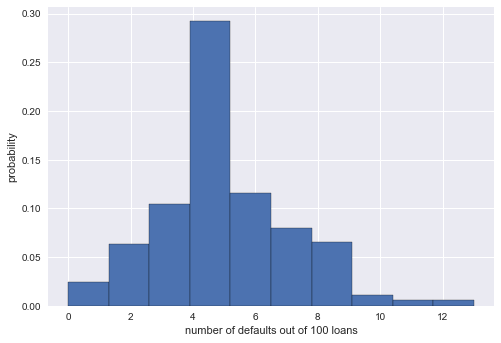

In [104]:
n_defaults = np.empty(1000)

for i in range(len(n_defaults)):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)
    
_ = plt.hist(n_defaults, normed = True)
_ = plt.xlabel("number of defaults out of 100 loans")
_ = plt.ylabel("probability")
plt.show()

### Binomial distribution - the story:

The number r of successes in n Bernoulli trials with probability p of success, is Binomially distributed...

Example: The number r of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed

In [105]:
np.random.binomial(4, 0.5)

2

In [106]:
np.random.binomial(4, 0.5, size = 10)

array([4, 3, 2, 2, 2, 2, 1, 4, 3, 3])

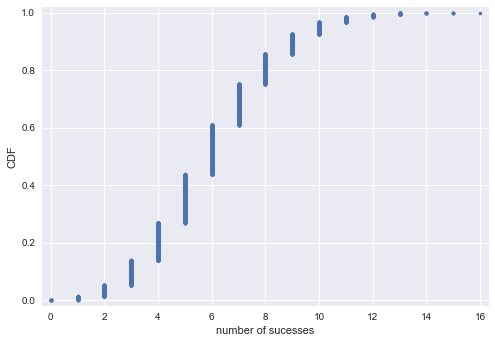

In [108]:
samples = np.random.binomial(60, 0.1, size = 10000)

x, y = ecdf(samples)

_ = plt.plot(x, y, marker = ".", linestyle = "none")
plt.margins(0.02)

_ = plt.xlabel("number of sucesses")
_ = plt.ylabel("CDF")

plt.show()

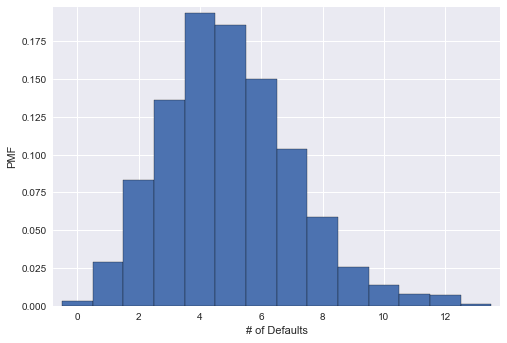

In [114]:
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

_ = plt.hist(n_defaults, bins = bins, normed = True)
plt.margins(0.02)

_ = plt.xlabel("# of Defaults")
_ = plt.ylabel("PMF")
plt.show()